In [23]:
from bitfinex.client import Client
import pandas as pd
from ipywidgets import interact, interactive, fixed
from ipywidgets import widgets
from IPython.display import display

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [24]:
client = Client()

In [25]:
symbols = client.symbols()

In [26]:
@interact(symbol=widgets.Dropdown(options=symbols,description="Select a ticker"))
def ticker(symbol):
    tick = client.ticker(symbol)
    df = pd.DataFrame(tick,index=[symbol])
    df.timestamp = pd.to_datetime(df.timestamp, unit='s')
    return df

,ask,bid,last_price,mid,timestamp
btcusd,678.05,678.02,678.05,678.035,2016-07-01 12:36:54


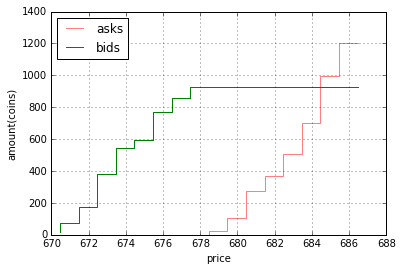

In [96]:
def calc_OB_curves(asks,bids, bins):
    ca = []
    cb = []
    for c in bins:
        ca.append(asks[asks.price<=c].amount.sum())
        cb.append(bids[bids.price<=c].amount.sum())
    return ca,cb

@interact(symbol=widgets.Dropdown(options=symbols,description="Select a ticker"), 
          n=widgets.BoundedIntText(min=1,max=10000,value=100, description='samples'),
          res=widgets.Dropdown(options={'0.1':0.1, '1':1,'10':10},description='Agregation level'))
def order_book(symbol, n, res):
    parameters = {'limit_asks': n, 'limit_bids': n}
    book = client.order_book(symbol, parameters)
    
    bids = pd.DataFrame(book['bids'])
    bids.timestamp = pd.to_datetime(bids.timestamp, unit='s')
    bids.set_index('timestamp', inplace=True)
    asks = pd.DataFrame(book['asks'])
    asks.timestamp = pd.to_datetime(asks.timestamp, unit='s')
    asks.set_index('timestamp', inplace=True)
    bins = np.arange(min(min(asks.price),bids.price.min()),max(asks.price.max(),bids.price.max()),res)
#     plt.hist([asks.price, bids.price], color=['red', 'green'], bins=bins, cumulative=True, label=['asks','bids'])
    ca,cb = calc_OB_curves(asks,bids,bins)
    plt.plot(bins, ca, 'r', label='asks', drawstyle='steps', fillstyle='full', alpha=0.5)
    plt.plot(bins, cb, 'g', label='bids', drawstyle='steps')
    
    plt.ylabel('amount(coins)')
    plt.grid()
    plt.xlabel('price')
    plt.legend(loc=0)

    return #asks,bids
    

In [79]:
parameters = {'limit_asks': 20, 'limit_bids': 20}

#print(client.lendbook('btc', parameters))
print(client.order_book('btcusd', parameters))

{'bids': [{'timestamp': 1467396317.0, 'amount': 1.558985, 'price': 678.17}, {'timestamp': 1467395844.0, 'amount': 0.04, 'price': 678.11}, {'timestamp': 1467396293.0, 'amount': 0.2, 'price': 678.1}, {'timestamp': 1467396183.0, 'amount': 0.1, 'price': 678.0}, {'timestamp': 1467396316.0, 'amount': 7.3632, 'price': 677.99}, {'timestamp': 1467395669.0, 'amount': 4.86, 'price': 677.97}, {'timestamp': 1467396033.0, 'amount': 0.2, 'price': 677.5}, {'timestamp': 1467396336.0, 'amount': 20.717, 'price': 677.44}, {'timestamp': 1467396332.0, 'amount': 24.4319, 'price': 677.37}, {'timestamp': 1467393945.0, 'amount': 0.1, 'price': 677.18}, {'timestamp': 1467392921.0, 'amount': 3.0, 'price': 677.15}, {'timestamp': 1467395887.0, 'amount': 0.05, 'price': 677.11}, {'timestamp': 1467396327.0, 'amount': 8.79, 'price': 677.09}, {'timestamp': 1467396255.0, 'amount': 19.5204, 'price': 677.08}, {'timestamp': 1467396331.0, 'amount': 5.0961906, 'price': 677.03}, {'timestamp': 1467395674.0, 'amount': 4.86, 'pric

In [71]:
bar?